In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/concrete-mix-design-and-strength/2500 Concrete design mixes.csv


As mentioned in the dataset description, concrete's carbon footprint is massive. One way of reducing the embedded C02 is to decrease the amount of cement used whilst still achieving the same 7 and 28 day strength values. 

The simple analysis below follows "concrete" logic, rather than statistical correlation between columns and data. In other words, I will focus on what is important from concrete chemistry perspective.

In [2]:
g25 = pd.read_csv("/kaggle/input/concrete-mix-design-and-strength/2500 Concrete design mixes.csv")

In [3]:
g25.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2286 entries, 0 to 2285
Data columns (total 23 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Unnamed: 0                                  2286 non-null   int64  
 1   Type_of_course_Aggregate                    2286 non-null   object 
 2   Type_of_Fine_Aggregate_                     2286 non-null   object 
 3   Max._Size_of_Coarse_Aggregate_(mm)          2286 non-null   object 
 4   Passing_0.6_mm_Sieve_(%)                    2286 non-null   float64
 5   Target_Mean_Strength_(N/mm2)                2286 non-null   object 
 6   Cement_O.P.C_(Kg/m3)                        2286 non-null   float64
 7   W/C_Ratio                                   2286 non-null   float64
 8   Water_Content_(Kg/m3)                       2286 non-null   float64
 9   Additive_Type_&_Dosage_(/100_kg_of_cement)  2286 non-null   object 
 10  Total_Aggreg

In [4]:
g25.columns = g25.columns.str.replace(" ", "_")
g25.rename(columns={"Strength_(N/mm2)_____________(7_days_avg.)":"7_day_str",
                    "Strength_(N/mm2)_____________(28_days_avg.)":"28_day_str"}, inplace = True)

In [5]:
g25.isnull().sum()

Unnamed:_0                                       0
Type_of_course_Aggregate                         0
Type_of_Fine_Aggregate_                          0
Max._Size_of_Coarse_Aggregate_(mm)               0
Passing_0.6_mm_Sieve_(%)                         0
Target_Mean_Strength_(N/mm2)                     0
Cement_O.P.C_(Kg/m3)                             0
W/C_Ratio                                        0
Water_Content_(Kg/m3)                            0
Additive_Type_&_Dosage_(/100_kg_of_cement)       0
Total_Aggregate_(Kg/m3)                          0
Fine_Aggregate_(Kg/m3)                           0
Coarse_Aggregate_(Kg/m3)                         0
Workability_Slump_(mm)                           0
Hardened_Concrete_Desnity_(avg.)                 0
7_day_str                                        0
28_day_str                                       0
Type_of_Coarse_Aggregate                         0
Type_of_Fine_Aggregate                           0
Passing_0.6mm_Sieve(%)         

Let's isolate really high early age (7 day) strength values.

In [6]:
g25_35mpa = g25[g25["7_day_str"] > 35]
g25_35mpa.head()

,Unnamed:_0,Type_of_course_Aggregate,Type_of_Fine_Aggregate_,Max._Size_of_Coarse_Aggregate_(mm),Passing_0.6_mm_Sieve_(%),Target_Mean_Strength_(N/mm2),Cement_O.P.C_(Kg/m3),W/C_Ratio,Water_Content_(Kg/m3),Additive_Type_&_Dosage_(/100_kg_of_cement),...,Workability_Slump_(mm),Hardened_Concrete_Desnity_(avg.),7_day_str,28_day_str,Type_of_Coarse_Aggregate,Type_of_Fine_Aggregate,Passing_0.6mm_Sieve(%),Additive_Type_&_Dos._(/100_Kg_of_cement),Admix_type,Admix_dosage
8,8,Crushed,Natural,20,33.4,38,370.0,0.50,185.0,consplat RP 364 *dos .8,...,125.0,2449.0,37.8,46.4,0,0,0.0,0,NaN,NaN
15,15,Crushed,Natural,20,47.0,38,340.0,0.53,180.0,type dos 1 lit,...,120.0,2449.0,36.5,0.0,0,0,0.0,0,NaN,NaN
16,16,Crushed,Natural,20,47.0,38,340.0,0.53,180.0,type dos 1 lit,...,120.0,2449.0,36.5,34.8,0,0,0.0,0,NaN,NaN
29,29,Crushed,Natural,20,40.0,38,400.0,0.45,180.0,R2004 dos 1.65 lit,...,200.0,2445.0,36.3,0.0,0,0,0.0,0,NaN,NaN
30,30,Crushed,Natural,20,40.0,38,400.0,0.45,180.0,R2004 dos 1.65 lit,...,200.0,2450.0,36.3,46.6,0,0,0.0,0,NaN,NaN


The water to cement ratio is the key factor which determines strength. It is also directly correlated (in field practice) with the workability - or slump.

The higher the W/C ratio, the higher the slump, the weaker the strength. 

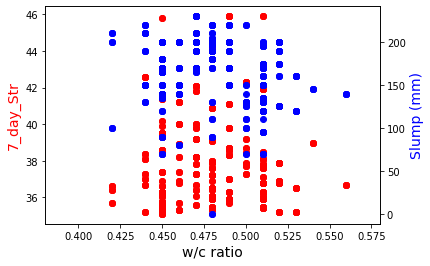

In [7]:
import matplotlib.pyplot as plt
x = g25_35mpa["W/C_Ratio"]
y = g25_35mpa["7_day_str"]

fig,ax = plt.subplots()
# make a plot
ax.scatter(x, y,
        color="red", 
        marker="o")
# set x-axis label
ax.set_xlabel("w/c ratio", fontsize = 14)
# set y-axis label
ax.set_ylabel("7_day_Str",
              color="red",
              fontsize=14)

ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.scatter(x, g25_35mpa["Workability_Slump_(mm)"],color="blue",marker="o")
ax2.set_ylabel("Slump (mm)",color="blue",fontsize=14)
plt.xlim(0.38, 0.58)
#plt.ylim(0, 160)
plt.show()

Let's quickly check the distribution of the 7 day values. 

(array([139., 123.,  96.,  63.,  35.,  24.,  28.,   0.,   6.,  11.]),
 array([35.1 , 36.18, 37.26, 38.34, 39.42, 40.5 , 41.58, 42.66, 43.74,
        44.82, 45.9 ]),
 <BarContainer object of 10 artists>)

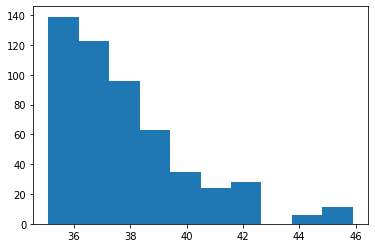

In [8]:
plt.hist(y)

There are few examples of 40+Mpa values. Let's check what admixtures have been used to achieve this performance.

In [9]:
g25_42mpa = g25[g25["7_day_str"] > 42]
g25_42mpa[["7_day_str", 
           "Additive_Type_&_Dos._(/100_Kg_of_cement)",
           "W/C_Ratio", 
           "Cement_O.P.C_(Kg/m3)"]].sort_values(by="7_day_str")

,7_day_str,Additive_Type_&_Dos._(/100_Kg_of_cement),W/C_Ratio,Cement_O.P.C_(Kg/m3)
1457,42.1,Type SP901 Dos. 1.0 lit,0.47,350.0
2187,42.1,Type SP901 Dos. 1.0 lit,0.47,350.0
1458,42.1,Type SP901 Dos. 1.0 lit,0.47,350.0
1790,42.1,Type SP901 Dos. 1.0 lit,0.47,350.0
1792,42.1,Type SP901 Dos. 1.0 lit,0.47,350.0
2182,42.1,Type SP901 Dos. 1.0 lit,0.47,350.0
1623,42.3,Type Euro Plast 8600 * Dos 1 lit,0.50,360.0
2050,42.3,Type Euro Plast 8600 * Dos 1 lit,0.50,360.0
1112,42.3,Type Euro Plast 8600 * Dos. 1.0 lit,0.50,360.0
1113,42.3,Type Euro Plast 8600 * Dos 1 lit,0.50,360.0


In [10]:
g25["Additive_Type_&_Dos._(/100_Kg_of_cement)"].unique()

array(['0', 'Type JY-4 pump Aiding * Dos 1.25l lit',
       'Type SP901 * Dos 1.0 lit', 'Type CF555 * Dos. 1.0 lit',
       'Type SP901 * Dos. 1.0 lit', 'Type SP 432 * Dos. 1.0 lit',
       'Type SP432 * Dos. 1.0 lit', 'Type TSEN934* Dos 1.0lit',
       'Type Rehobuild 850 * Dos. 0.75 lit', 'Type CF555 * Dos. 0.75 lit',
       'Type JY- 4 Pump-Aiding * Dos. 1.25 lit',
       'Type SP432 * Dos. 1.25 lit', 'Type SP901 Dos. 1.0 lit',
       'Type Kemia Crete 850* Dos 0.75 lit', 'Type SP901 Dos. 3.0 lit/m3',
       'Type TSEN934* Dos 0.75lit', 'Type SP901 Dos. 0.75lit',
       'Type SP901 Dos. 0.75 lit', 'Type Euro 8600 * Dos. 1.0 lit',
       'Type Dos. 2.3 lit', 'Type coplast S-R* Dos.2.3 lit',
       ' Type SP901 * Dos. 1.5 lit', 'Type Basf 8800E* Dos 1.0lit',
       'SP 432 * Dos. 0.75 lit', 'Type SP 901 * Dos. 1.0 lit',
       'Type Sikament R2004 * Dos. 1.0',
       'Type Sikament 2004 * Dos. 1.0 lit', 'Type SP 8600* Dos 1.0 lit ',
       'Type R2004 * Dos 1.25 lit', 'Type 8600 * Dos

In [11]:
y = g25["7_day_str"]
X = g25[[ 
         
        "Cement_O.P.C_(Kg/m3)",
        "W/C_Ratio",
        "Water_Content_(Kg/m3)",
        "Fine_Aggregate_(Kg/m3)",
         "Coarse_Aggregate_(Kg/m3)",
         "Workability_Slump_(mm)",
         "Hardened_Concrete_Desnity_(avg.)",
         "Passing_0.6_mm_Sieve_(%)"
        ]]

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.65)

regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

y_pred = regressor.predict(X_train) 
print('Mean Absolute Error (Train set):',metrics.mean_absolute_error(y_train, y_pred)) 
rmse = np.sqrt(np.mean((y_train - y_pred)**2))
print('Root Mean Absolute Error (Train set):',rmse)
regressor.score(X_train,y_train)

Mean Absolute Error (Train set): 3.9957045080240308
Root Mean Absolute Error (Train set): 5.618241599939254


0.1889976287331938

In [12]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
knn_model = KNeighborsRegressor(n_neighbors=2)
knn_model.fit(X_train, y_train)
train_preds = knn_model.predict(X_train)
mse = mean_squared_error(y_train, train_preds)
rmse = sqrt(mse)
print('Mean Absolute Error (Train set):', mse)
print('Root Mean Squared Error (Train set):',rmse)
knn_model.score(X_train,y_train)

Mean Absolute Error (Train set): 2.8265622895622893
Root Mean Squared Error (Train set): 1.6812383202753527


0.9273760506828475